In [2]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ds_train = xr.open_dataset('datasets/train.nc')
ds_val = xr.open_dataset('datasets/val.nc')
ds_test = xr.open_dataset('datasets/test.nc')

In [5]:
def dataset_to_dataloader(_ds, batch_size=1024, shuffle=False):
  X = torch.tensor(_ds['X'].values.astype('float32'))
  Y = torch.tensor(_ds['Xcouple'].values.astype('float32'))
  #https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader
  return DataLoader(TensorDataset(X,Y), batch_size=batch_size, shuffle=shuffle)

In [6]:
train_loader=dataset_to_dataloader(ds_train, shuffle=True)
val_loader=dataset_to_dataloader(ds_train)

In [25]:
ref = L96_XY()
coarse = L96_X()

In [44]:
beta0 = L96_X.from_dataset(train_loader, val_loader, beta=0, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:616: UserWarning: Checkpoint directory /home/pp2681/L96_predictability/lightning_logs/version_25954153/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/ext3/miniconda3/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50

Epoch 0:  41%|████      | 40/98 [00:00<00:00, 117.40it/s, loss=8.48, v_num=2.6e+7, train_loss=6.440, train_MSE=6.440, train_reg=-]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 77.07it/s, loss=3.59, v_num=2.6e+7, train_loss=3.480, train_MSE=3.480, train_reg=-, val_loss=5.100, val_MSE=5.100, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 117.79it/s, loss=3.08, v_num=2.6e+7, train_loss=3.030, train_MSE=3.030, train_reg=-, val_loss=3.330, val_MSE=3.330, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 112.06it/s, loss=2.89, v_num=2.6e+7, train_loss=2.820, train_MSE=2.820, train_reg=-, val_loss=3.030, val_MSE=3.030, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 122.38it/s, loss=2.78, v_num=2.6e+7, train_loss=2.790, train_MSE=2.790, train_reg=-, val_loss=2.920, val_MSE=2.920, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 5

Epoch 10:  41%|████      | 40/98 [00:00<00:00, 80.95it/s, loss=2.47, v_num=2.6e+7, train_loss=2.440, train_MSE=2.440, train_reg=-, val_loss=2.470, val_MSE=2.470, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 112.52it/s, loss=2.44, v_num=2.6e+7, train_loss=2.390, train_MSE=2.390, train_reg=-, val_loss=2.460, val_MSE=2.460, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 123.53it/s, loss=2.42, v_num=2.6e+7, train_loss=2.370, train_MSE=2.370, train_reg=-, val_loss=2.410, val_MSE=2.410, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98 [00:00<00:00, 117.39it/s, loss=2.39, v_num=2.6e+7, train_loss=2.450, train_MSE=2.450, train_reg=-, val_loss=2.420, val_MSE=2.420, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 14:  41%|████      | 40/98 [00:00<00:00, 85.05it/s, loss=2.39, v_num=2.6e+7, train_loss=2.370, train_MSE=2.370, train_reg=-, val_loss=2.390, val_MSE=2.390, va

Epoch 19:  41%|████      | 40/98 [00:00<00:00, 67.03it/s, loss=2.33, v_num=2.6e+7, train_loss=2.420, train_MSE=2.420, train_reg=-, val_loss=2.350, val_MSE=2.350, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 123.92it/s, loss=2.34, v_num=2.6e+7, train_loss=2.320, train_MSE=2.320, train_reg=-, val_loss=2.390, val_MSE=2.390, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/98 [00:00<00:00, 81.09it/s, loss=2.31, v_num=2.6e+7, train_loss=2.280, train_MSE=2.280, train_reg=-, val_loss=2.360, val_MSE=2.360, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 22:  41%|████      | 40/98 [00:00<00:00, 123.49it/s, loss=2.31, v_num=2.6e+7, train_loss=2.320, train_MSE=2.320, train_reg=-, val_loss=2.320, val_MSE=2.320, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 23:  41%|████      | 40/98 [00:00<00:00, 123.52it/s, loss=2.34, v_num=2.6e+7, train_loss=2.320, train_MSE=2.320, train_reg=-, val_loss=2.310, val_MSE=2.310, v

Epoch 28:  41%|████      | 40/98 [00:00<00:00, 87.27it/s, loss=2.27, v_num=2.6e+7, train_loss=2.220, train_MSE=2.220, train_reg=-, val_loss=2.240, val_MSE=2.240, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40/98 [00:00<00:00, 87.51it/s, loss=2.27, v_num=2.6e+7, train_loss=2.300, train_MSE=2.300, train_reg=-, val_loss=2.240, val_MSE=2.240, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 30:  41%|████      | 40/98 [00:00<00:00, 122.26it/s, loss=2.27, v_num=2.6e+7, train_loss=2.270, train_MSE=2.270, train_reg=-, val_loss=2.280, val_MSE=2.280, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 31:  41%|████      | 40/98 [00:00<00:00, 123.30it/s, loss=2.25, v_num=2.6e+7, train_loss=2.190, train_MSE=2.190, train_reg=-, val_loss=2.240, val_MSE=2.240, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 32:  41%|████      | 40/98 [00:00<00:00, 123.65it/s, loss=2.25, v_num=2.6e+7, train_loss=2.290, train_MSE=2.290, train_reg=-, val_loss=2.260, val_MSE=2.260, v

Epoch 38:  41%|████      | 40/98 [00:00<00:00, 123.23it/s, loss=2.22, v_num=2.6e+7, train_loss=2.230, train_MSE=2.230, train_reg=-, val_loss=2.230, val_MSE=2.230, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 39:  41%|████      | 40/98 [00:00<00:00, 123.35it/s, loss=2.22, v_num=2.6e+7, train_loss=2.190, train_MSE=2.190, train_reg=-, val_loss=2.230, val_MSE=2.230, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 40:  41%|████      | 40/98 [00:00<00:00, 106.79it/s, loss=2.22, v_num=2.6e+7, train_loss=2.240, train_MSE=2.240, train_reg=-, val_loss=2.190, val_MSE=2.190, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 41:  41%|████      | 40/98 [00:00<00:00, 69.96it/s, loss=2.22, v_num=2.6e+7, train_loss=2.200, train_MSE=2.200, train_reg=-, val_loss=2.200, val_MSE=2.200, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 42:  41%|████      | 40/98 [00:00<00:00, 62.00it/s, loss=2.21, v_num=2.6e+7, train_loss=2.290, train_MSE=2.290, train_reg=-, val_loss=2.200, val_MSE=2.200, va

Epoch 47:  41%|████      | 40/98 [00:00<00:00, 123.85it/s, loss=2.19, v_num=2.6e+7, train_loss=2.230, train_MSE=2.230, train_reg=-, val_loss=2.190, val_MSE=2.190, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 48:  41%|████      | 40/98 [00:00<00:00, 117.46it/s, loss=2.19, v_num=2.6e+7, train_loss=2.230, train_MSE=2.230, train_reg=-, val_loss=2.180, val_MSE=2.180, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 113.30it/s, loss=2.19, v_num=2.6e+7, train_loss=2.190, train_MSE=2.190, train_reg=-, val_loss=2.190, val_MSE=2.190, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 78.71it/s, loss=2.18, v_num=2.6e+7, train_loss=2.160, train_MSE=2.160, train_reg=-, val_loss=2.170, val_MSE=2.170, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 51:  41%|████      | 40/98 [00:00<00:00, 72.35it/s, loss=2.19, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_reg=-, val_loss=2.200, val_MSE=2.200, val

Epoch 56:  41%|████      | 40/98 [00:00<00:00, 108.73it/s, loss=2.17, v_num=2.6e+7, train_loss=2.210, train_MSE=2.210, train_reg=-, val_loss=2.170, val_MSE=2.170, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 118.96it/s, loss=2.17, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.160, val_MSE=2.160, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 113.98it/s, loss=2.17, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_reg=-, val_loss=2.180, val_MSE=2.180, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 77.95it/s, loss=2.14, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_reg=-, val_loss=2.160, val_MSE=2.160, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 60:  41%|████      | 40/98 [00:00<00:00, 82.54it/s, loss=2.18, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_reg=-, val_loss=2.130, val_MSE=2.130, va

Epoch 65:  41%|████      | 40/98 [00:00<00:00, 106.76it/s, loss=2.14, v_num=2.6e+7, train_loss=2.180, train_MSE=2.180, train_reg=-, val_loss=2.150, val_MSE=2.150, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 114.36it/s, loss=2.12, v_num=2.6e+7, train_loss=2.140, train_MSE=2.140, train_reg=-, val_loss=2.170, val_MSE=2.170, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 123.09it/s, loss=2.12, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_reg=-, val_loss=2.110, val_MSE=2.110, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 87.07it/s, loss=2.14, v_num=2.6e+7, train_loss=2.180, train_MSE=2.180, train_reg=-, val_loss=2.130, val_MSE=2.130, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 69:  41%|████      | 40/98 [00:00<00:00, 87.44it/s, loss=2.14, v_num=2.6e+7, train_loss=2.100, train_MSE=2.100, train_reg=-, val_loss=2.130, val_MSE=2.130, va

Epoch 75:  41%|████      | 40/98 [00:00<00:00, 123.57it/s, loss=2.12, v_num=2.6e+7, train_loss=2.010, train_MSE=2.010, train_reg=-, val_loss=2.120, val_MSE=2.120, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 121.96it/s, loss=2.13, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_reg=-, val_loss=2.140, val_MSE=2.140, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/98 [00:00<00:00, 85.81it/s, loss=2.13, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_reg=-, val_loss=2.110, val_MSE=2.110, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 78:  41%|████      | 40/98 [00:00<00:00, 86.29it/s, loss=2.12, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.130, val_MSE=2.130, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 79:  41%|████      | 40/98 [00:00<00:00, 114.47it/s, loss=2.12, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_reg=-, val_loss=2.120, val_MSE=2.120, v

Epoch 84:  41%|████      | 40/98 [00:00<00:00, 123.15it/s, loss=2.11, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.120, val_MSE=2.120, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/98 [00:00<00:00, 122.56it/s, loss=2.1, v_num=2.6e+7, train_loss=2.110, train_MSE=2.110, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 86:  41%|████      | 40/98 [00:00<00:00, 86.20it/s, loss=2.12, v_num=2.6e+7, train_loss=2.130, train_MSE=2.130, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 87:  41%|████      | 40/98 [00:00<00:00, 86.43it/s, loss=2.12, v_num=2.6e+7, train_loss=2.120, train_MSE=2.120, train_reg=-, val_loss=2.080, val_MSE=2.080, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 88:  41%|████      | 40/98 [00:00<00:00, 122.22it/s, loss=2.09, v_num=2.6e+7, train_loss=2.150, train_MSE=2.150, train_reg=-, val_loss=2.100, val_MSE=2.100, v

Epoch 93:  41%|████      | 40/98 [00:00<00:00, 123.03it/s, loss=2.09, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_reg=-, val_loss=2.080, val_MSE=2.080, val_reg=0.000]
Validation: 0it [00:00, ?it/s]
Epoch 94:  41%|████      | 40/98 [00:00<00:00, 99.99it/s, loss=2.12, v_num=2.6e+7, train_loss=2.170, train_MSE=2.170, train_reg=-, val_loss=2.140, val_MSE=2.140, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 95:  41%|████      | 40/98 [00:00<00:00, 65.30it/s, loss=2.08, v_num=2.6e+7, train_loss=2.090, train_MSE=2.090, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 96:  41%|████      | 40/98 [00:00<00:00, 85.20it/s, loss=2.11, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_reg=-, val_loss=2.100, val_MSE=2.100, val_reg=0.000] 
Validation: 0it [00:00, ?it/s]
Epoch 97:  41%|████      | 40/98 [00:00<00:00, 110.81it/s, loss=2.08, v_num=2.6e+7, train_loss=2.010, train_MSE=2.010, train_reg=-, val_loss=2.070, val_MSE=2.070, v

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 129.91it/s, loss=2.1, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-, val_loss=2.190, val_MSE=2.190, val_reg=0.000]


In [45]:
beta1 = L96_X.from_dataset(train_loader, val_loader, beta=1, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 72.49it/s, loss=7.62, v_num=2.6e+7, train_loss=5.650, train_MSE=5.660, train_reg=-.0123]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 99.97it/s, loss=3.34, v_num=2.6e+7, train_loss=3.190, train_MSE=3.200, train_reg=-.0126, val_loss=4.550, val_MSE=4.570, val_reg=-.0124]
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 91.78it/s, loss=2.97, v_num=2.6e+7, train_loss=2.950, train_MSE=2.970, train_reg=-.0119, val_loss=3.160, val_MSE=3.170, val_reg=-.0126] 
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 122.03it/s, loss=2.82, v_num=2.6e+7, train_loss=2.790, train_MSE=2.800, train_reg=-.0111, val_loss=2.910, val_MSE=2.920, val_reg=-.0117]
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 68.01it/s, loss=2.73, v_num=2.6e+7, train_loss=2.720, train_MSE=2.730, train_reg=-.0106, val_loss=2.760, val_MSE=2.770, val_reg=-.0109] 
Validation

Epoch 10:  41%|████      | 40/98 [00:00<00:00, 121.70it/s, loss=2.46, v_num=2.6e+7, train_loss=2.530, train_MSE=2.540, train_reg=-.00979, val_loss=2.430, val_MSE=2.440, val_reg=-.00923]
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 105.75it/s, loss=2.44, v_num=2.6e+7, train_loss=2.360, train_MSE=2.370, train_reg=-.00911, val_loss=2.410, val_MSE=2.420, val_reg=-.00907]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 69.45it/s, loss=2.39, v_num=2.6e+7, train_loss=2.400, train_MSE=2.410, train_reg=-.00923, val_loss=2.430, val_MSE=2.440, val_reg=-.00924] 
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98 [00:00<00:00, 85.34it/s, loss=2.36, v_num=2.6e+7, train_loss=2.400, train_MSE=2.410, train_reg=-.00917, val_loss=2.370, val_MSE=2.380, val_reg=-.00881] 
Validation: 0it [00:00, ?it/s]
Epoch 14:  41%|████      | 40/98 [00:00<00:00, 67.44it/s, loss=2.34, v_num=2.6e+7, train_loss=2.340, train_MSE=2.350, train_reg=-.00

Epoch 19:  41%|████      | 40/98 [00:00<00:00, 120.49it/s, loss=2.27, v_num=2.6e+7, train_loss=2.300, train_MSE=2.310, train_reg=-.00842, val_loss=2.260, val_MSE=2.270, val_reg=-.00816]
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 119.21it/s, loss=2.25, v_num=2.6e+7, train_loss=2.260, train_MSE=2.270, train_reg=-.00822, val_loss=2.280, val_MSE=2.290, val_reg=-.00824]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/98 [00:00<00:00, 119.12it/s, loss=2.23, v_num=2.6e+7, train_loss=2.270, train_MSE=2.280, train_reg=-.00794, val_loss=2.240, val_MSE=2.250, val_reg=-.00802]
Validation: 0it [00:00, ?it/s]
Epoch 22:  41%|████      | 40/98 [00:00<00:00, 93.07it/s, loss=2.22, v_num=2.6e+7, train_loss=2.180, train_MSE=2.180, train_reg=-.00773, val_loss=2.250, val_MSE=2.260, val_reg=-.00804] 
Validation: 0it [00:00, ?it/s]
Epoch 23:  41%|████      | 40/98 [00:00<00:00, 76.17it/s, loss=2.22, v_num=2.6e+7, train_loss=2.270, train_MSE=2.280, train_reg=-.00

Epoch 28:  41%|████      | 40/98 [00:00<00:00, 68.90it/s, loss=2.19, v_num=2.6e+7, train_loss=2.230, train_MSE=2.240, train_reg=-.00795, val_loss=2.180, val_MSE=2.190, val_reg=-.00769]
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40/98 [00:01<00:01, 38.72it/s, loss=2.17, v_num=2.6e+7, train_loss=2.270, train_MSE=2.280, train_reg=-.00792, val_loss=2.160, val_MSE=2.170, val_reg=-.00763]
Validation: 0it [00:00, ?it/s]
Epoch 30:  41%|████      | 40/98 [00:00<00:00, 104.64it/s, loss=2.19, v_num=2.6e+7, train_loss=2.170, train_MSE=2.180, train_reg=-.00762, val_loss=2.180, val_MSE=2.190, val_reg=-.00767]
Validation: 0it [00:00, ?it/s]
Epoch 31:  41%|████      | 40/98 [00:00<00:00, 109.42it/s, loss=2.16, v_num=2.6e+7, train_loss=2.170, train_MSE=2.180, train_reg=-.00747, val_loss=2.150, val_MSE=2.160, val_reg=-.00757]
Validation: 0it [00:00, ?it/s]
Epoch 32:  41%|████      | 40/98 [00:00<00:00, 87.04it/s, loss=2.15, v_num=2.6e+7, train_loss=2.180, train_MSE=2.180, train_reg=-.0076

Epoch 37:  41%|████      | 40/98 [00:00<00:00, 86.87it/s, loss=2.14, v_num=2.6e+7, train_loss=2.190, train_MSE=2.200, train_reg=-.00744, val_loss=2.150, val_MSE=2.150, val_reg=-.00737] 
Validation: 0it [00:00, ?it/s]
Epoch 38:  41%|████      | 40/98 [00:00<00:00, 122.75it/s, loss=2.14, v_num=2.6e+7, train_loss=2.110, train_MSE=2.120, train_reg=-.00715, val_loss=2.110, val_MSE=2.120, val_reg=-.00719]
Validation: 0it [00:00, ?it/s]
Epoch 39:  41%|████      | 40/98 [00:00<00:00, 122.46it/s, loss=2.12, v_num=2.6e+7, train_loss=2.120, train_MSE=2.130, train_reg=-.00729, val_loss=2.120, val_MSE=2.130, val_reg=-.00726]
Validation: 0it [00:00, ?it/s]
Epoch 40:  41%|████      | 40/98 [00:00<00:00, 123.01it/s, loss=2.11, v_num=2.6e+7, train_loss=2.070, train_MSE=2.080, train_reg=-.00711, val_loss=2.110, val_MSE=2.120, val_reg=-.00714]
Validation: 0it [00:00, ?it/s]
Epoch 41:  41%|████      | 40/98 [00:00<00:00, 73.12it/s, loss=2.09, v_num=2.6e+7, train_loss=2.090, train_MSE=2.100, train_reg=-.00

Epoch 46:  41%|████      | 40/98 [00:00<00:00, 72.58it/s, loss=2.11, v_num=2.6e+7, train_loss=2.150, train_MSE=2.160, train_reg=-.00707, val_loss=2.100, val_MSE=2.100, val_reg=-.00706]
Validation: 0it [00:00, ?it/s]
Epoch 47:  41%|████      | 40/98 [00:00<00:00, 102.52it/s, loss=2.09, v_num=2.6e+7, train_loss=2.050, train_MSE=2.060, train_reg=-.00679, val_loss=2.110, val_MSE=2.120, val_reg=-.00716]
Validation: 0it [00:00, ?it/s]
Epoch 48:  41%|████      | 40/98 [00:00<00:00, 95.14it/s, loss=2.1, v_num=2.6e+7, train_loss=2.190, train_MSE=2.200, train_reg=-.00737, val_loss=2.070, val_MSE=2.080, val_reg=-.00692]  
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 116.99it/s, loss=2.08, v_num=2.6e+7, train_loss=2.080, train_MSE=2.080, train_reg=-.00704, val_loss=2.100, val_MSE=2.100, val_reg=-.00707]
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:01, 57.89it/s, loss=2.1, v_num=2.6e+7, train_loss=2.100, train_MSE=2.110, train_reg=-.0068

Epoch 55:  41%|████      | 40/98 [00:00<00:00, 74.39it/s, loss=2.09, v_num=2.6e+7, train_loss=2.020, train_MSE=2.030, train_reg=-.00673, val_loss=2.090, val_MSE=2.100, val_reg=-.00695] 
Validation: 0it [00:00, ?it/s]
Epoch 56:  41%|████      | 40/98 [00:00<00:00, 75.71it/s, loss=2.04, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_reg=-.00685, val_loss=2.090, val_MSE=2.100, val_reg=-.00699] 
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 108.17it/s, loss=2.07, v_num=2.6e+7, train_loss=2.030, train_MSE=2.040, train_reg=-.0069, val_loss=2.080, val_MSE=2.090, val_reg=-.0069]
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 113.15it/s, loss=2.09, v_num=2.6e+7, train_loss=2.030, train_MSE=2.040, train_reg=-.00676, val_loss=2.090, val_MSE=2.090, val_reg=-.00704]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 74.14it/s, loss=2.11, v_num=2.6e+7, train_loss=2.160, train_MSE=2.170, train_reg=-.0072

Epoch 64:  41%|████      | 40/98 [00:00<00:00, 81.79it/s, loss=2.02, v_num=2.6e+7, train_loss=2.050, train_MSE=2.060, train_reg=-.00658, val_loss=2.070, val_MSE=2.080, val_reg=-.00682] 
Validation: 0it [00:00, ?it/s]
Epoch 65:  41%|████      | 40/98 [00:00<00:00, 119.53it/s, loss=2.06, v_num=2.6e+7, train_loss=2.060, train_MSE=2.070, train_reg=-.00674, val_loss=2.040, val_MSE=2.040, val_reg=-.00673]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 100.56it/s, loss=2.05, v_num=2.6e+7, train_loss=2.060, train_MSE=2.070, train_reg=-.00659, val_loss=2.050, val_MSE=2.060, val_reg=-.00666]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 109.42it/s, loss=2.07, v_num=2.6e+7, train_loss=2.010, train_MSE=2.020, train_reg=-.00668, val_loss=2.030, val_MSE=2.040, val_reg=-.0066]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 64.94it/s, loss=2.04, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_reg=-.006

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 77.97it/s, loss=2.04, v_num=2.6e+7, train_loss=2.020, train_MSE=2.030, train_reg=-.00652, val_loss=2.060, val_MSE=2.070, val_reg=-.00674] 
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 113.09it/s, loss=2.03, v_num=2.6e+7, train_loss=2.040, train_MSE=2.050, train_reg=-.0066, val_loss=2.030, val_MSE=2.030, val_reg=-.00658] 
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 117.84it/s, loss=2.06, v_num=2.6e+7, train_loss=2.100, train_MSE=2.110, train_reg=-.00666, val_loss=2.050, val_MSE=2.060, val_reg=-.00665]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 111.17it/s, loss=2.03, v_num=2.6e+7, train_loss=2.070, train_MSE=2.080, train_reg=-.00674, val_loss=2.040, val_MSE=2.050, val_reg=-.00675]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/98 [00:00<00:00, 65.89it/s, loss=2.02, v_num=2.6e+7, train_loss=1.950, train_MSE=1.960, train_reg=-.00

Epoch 82:  41%|████      | 40/98 [00:00<00:00, 84.60it/s, loss=2.03, v_num=2.6e+7, train_loss=2.010, train_MSE=2.010, train_reg=-.00633, val_loss=2.010, val_MSE=2.020, val_reg=-.00642] 
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 101.70it/s, loss=2.03, v_num=2.6e+7, train_loss=2.030, train_MSE=2.040, train_reg=-.0065, val_loss=2.030, val_MSE=2.040, val_reg=-.00658] 
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 106.39it/s, loss=2.02, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_reg=-.00653, val_loss=2.010, val_MSE=2.010, val_reg=-.00637]
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/98 [00:00<00:00, 99.57it/s, loss=2.02, v_num=2.6e+7, train_loss=2.050, train_MSE=2.050, train_reg=-.00653, val_loss=2.030, val_MSE=2.040, val_reg=-.00662] 
Validation: 0it [00:00, ?it/s]
Epoch 86:  41%|████      | 40/98 [00:00<00:00, 83.38it/s, loss=2.02, v_num=2.6e+7, train_loss=2.010, train_MSE=2.020, train_reg=-.00

Epoch 91:  41%|████      | 40/98 [00:00<00:00, 69.95it/s, loss=2, v_num=2.6e+7, train_loss=2.030, train_MSE=2.030, train_reg=-.00624, val_loss=2.000, val_MSE=2.010, val_reg=-.00637]   
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 115.86it/s, loss=1.99, v_num=2.6e+7, train_loss=1.930, train_MSE=1.930, train_reg=-.00608, val_loss=2.000, val_MSE=2.010, val_reg=-.00641]
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████      | 40/98 [00:00<00:00, 109.27it/s, loss=2.01, v_num=2.6e+7, train_loss=2.030, train_MSE=2.040, train_reg=-.00648, val_loss=2.010, val_MSE=2.010, val_reg=-.00642]
Validation: 0it [00:00, ?it/s]
Epoch 94:  41%|████      | 40/98 [00:00<00:00, 119.51it/s, loss=1.99, v_num=2.6e+7, train_loss=2.020, train_MSE=2.030, train_reg=-.00631, val_loss=2.010, val_MSE=2.010, val_reg=-.00642]
Validation: 0it [00:00, ?it/s]
Epoch 95:  41%|████      | 40/98 [00:00<00:00, 84.38it/s, loss=2.01, v_num=2.6e+7, train_loss=1.960, train_MSE=1.970, train_reg=-.006

Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 137.89it/s, loss=2.01, v_num=2.6e+7, train_loss=2.050, train_MSE=2.060, train_reg=-.00664, val_loss=1.990, val_MSE=2.000, val_reg=-.00627]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 137.22it/s, loss=2.01, v_num=2.6e+7, train_loss=2.050, train_MSE=2.060, train_reg=-.00664, val_loss=1.990, val_MSE=2.000, val_reg=-.00627]


In [46]:
beta10 = L96_X.from_dataset(train_loader, val_loader, beta=10, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 80.93it/s, loss=8.32, v_num=2.6e+7, train_loss=6.080, train_MSE=6.200, train_reg=-.124]  
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 99.48it/s, loss=3.33, v_num=2.6e+7, train_loss=3.160, train_MSE=3.290, train_reg=-.130, val_loss=5.040, val_MSE=5.170, val_reg=-.125] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 116.28it/s, loss=2.92, v_num=2.6e+7, train_loss=2.870, train_MSE=2.990, train_reg=-.121, val_loss=3.150, val_MSE=3.280, val_reg=-.132]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 115.71it/s, loss=2.82, v_num=2.6e+7, train_loss=2.800, train_MSE=2.920, train_reg=-.117, val_loss=2.870, val_MSE=2.990, val_reg=-.120]
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 77.47it/s, loss=2.71, v_num=2.6e+7, train_loss=2.710, train_MSE=2.820, train_reg=-.110, val_loss=2.760, val_MSE=2.880, val_reg=-.115] 
Validation: 0it 

Epoch 10:  41%|████      | 40/98 [00:00<00:00, 121.51it/s, loss=2.41, v_num=2.6e+7, train_loss=2.440, train_MSE=2.530, train_reg=-.0959, val_loss=2.410, val_MSE=2.500, val_reg=-.0957]
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 108.90it/s, loss=2.4, v_num=2.6e+7, train_loss=2.370, train_MSE=2.460, train_reg=-.0935, val_loss=2.370, val_MSE=2.470, val_reg=-.0944] 
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 104.88it/s, loss=2.36, v_num=2.6e+7, train_loss=2.330, train_MSE=2.430, train_reg=-.0934, val_loss=2.370, val_MSE=2.460, val_reg=-.094]
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98 [00:00<00:00, 83.52it/s, loss=2.34, v_num=2.6e+7, train_loss=2.300, train_MSE=2.390, train_reg=-.0918, val_loss=2.350, val_MSE=2.440, val_reg=-.0927] 
Validation: 0it [00:00, ?it/s]
Epoch 14:  41%|████      | 40/98 [00:00<00:00, 82.85it/s, loss=2.32, v_num=2.6e+7, train_loss=2.310, train_MSE=2.400, train_reg=-.0916, val_l

Epoch 19:  41%|████      | 40/98 [00:00<00:00, 122.13it/s, loss=2.27, v_num=2.6e+7, train_loss=2.230, train_MSE=2.310, train_reg=-.0855, val_loss=2.260, val_MSE=2.350, val_reg=-.0879]
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 106.49it/s, loss=2.27, v_num=2.6e+7, train_loss=2.260, train_MSE=2.340, train_reg=-.0881, val_loss=2.270, val_MSE=2.360, val_reg=-.088]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/98 [00:00<00:00, 110.75it/s, loss=2.26, v_num=2.6e+7, train_loss=2.200, train_MSE=2.280, train_reg=-.0858, val_loss=2.230, val_MSE=2.320, val_reg=-.086]
Validation: 0it [00:00, ?it/s]
Epoch 22:  41%|████      | 40/98 [00:00<00:00, 77.85it/s, loss=2.24, v_num=2.6e+7, train_loss=2.240, train_MSE=2.330, train_reg=-.0867, val_loss=2.270, val_MSE=2.360, val_reg=-.0888] 
Validation: 0it [00:00, ?it/s]
Epoch 23:  41%|████      | 40/98 [00:00<00:00, 70.38it/s, loss=2.22, v_num=2.6e+7, train_loss=2.150, train_MSE=2.240, train_reg=-.0841, val_lo

Epoch 28:  41%|████      | 40/98 [00:00<00:00, 101.75it/s, loss=2.21, v_num=2.6e+7, train_loss=2.230, train_MSE=2.310, train_reg=-.0843, val_loss=2.210, val_MSE=2.290, val_reg=-.0845]
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40/98 [00:00<00:00, 80.52it/s, loss=2.19, v_num=2.6e+7, train_loss=2.250, train_MSE=2.340, train_reg=-.0862, val_loss=2.180, val_MSE=2.260, val_reg=-.0833]
Validation: 0it [00:00, ?it/s]
Epoch 30:  41%|████      | 40/98 [00:00<00:00, 111.43it/s, loss=2.21, v_num=2.6e+7, train_loss=2.180, train_MSE=2.260, train_reg=-.0825, val_loss=2.180, val_MSE=2.260, val_reg=-.0834]
Validation: 0it [00:00, ?it/s]
Epoch 31:  41%|████      | 40/98 [00:00<00:00, 82.97it/s, loss=2.2, v_num=2.6e+7, train_loss=2.200, train_MSE=2.290, train_reg=-.0825, val_loss=2.190, val_MSE=2.280, val_reg=-.0827]  
Validation: 0it [00:00, ?it/s]
Epoch 32:  41%|████      | 40/98 [00:00<00:00, 61.61it/s, loss=2.17, v_num=2.6e+7, train_loss=2.250, train_MSE=2.340, train_reg=-.0837, val_l

Epoch 37:  41%|████      | 40/98 [00:00<00:00, 115.79it/s, loss=2.18, v_num=2.6e+7, train_loss=2.200, train_MSE=2.280, train_reg=-.0817, val_loss=2.130, val_MSE=2.210, val_reg=-.0796]
Validation: 0it [00:00, ?it/s]
Epoch 38:  41%|████      | 40/98 [00:00<00:00, 118.32it/s, loss=2.16, v_num=2.6e+7, train_loss=2.090, train_MSE=2.170, train_reg=-.0788, val_loss=2.190, val_MSE=2.270, val_reg=-.083]
Validation: 0it [00:00, ?it/s]
Epoch 39:  41%|████      | 40/98 [00:00<00:00, 121.24it/s, loss=2.15, v_num=2.6e+7, train_loss=2.240, train_MSE=2.320, train_reg=-.0825, val_loss=2.160, val_MSE=2.240, val_reg=-.0802]
Validation: 0it [00:00, ?it/s]
Epoch 40:  41%|████      | 40/98 [00:00<00:00, 83.05it/s, loss=2.14, v_num=2.6e+7, train_loss=2.150, train_MSE=2.230, train_reg=-.0803, val_loss=2.170, val_MSE=2.250, val_reg=-.0816] 
Validation: 0it [00:00, ?it/s]
Epoch 41:  41%|████      | 40/98 [00:00<00:00, 82.23it/s, loss=2.14, v_num=2.6e+7, train_loss=2.120, train_MSE=2.210, train_reg=-.0807, val_l

Epoch 46:  41%|████      | 40/98 [00:00<00:00, 122.78it/s, loss=2.13, v_num=2.6e+7, train_loss=2.090, train_MSE=2.170, train_reg=-.0771, val_loss=2.130, val_MSE=2.210, val_reg=-.0787]
Validation: 0it [00:00, ?it/s]
Epoch 47:  41%|████      | 40/98 [00:00<00:00, 86.52it/s, loss=2.13, v_num=2.6e+7, train_loss=2.140, train_MSE=2.220, train_reg=-.0783, val_loss=2.110, val_MSE=2.190, val_reg=-.0778]
Validation: 0it [00:00, ?it/s]
Epoch 48:  41%|████      | 40/98 [00:00<00:00, 123.60it/s, loss=2.09, v_num=2.6e+7, train_loss=2.120, train_MSE=2.200, train_reg=-.0786, val_loss=2.150, val_MSE=2.230, val_reg=-.0788]
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 80.21it/s, loss=2.1, v_num=2.6e+7, train_loss=2.060, train_MSE=2.140, train_reg=-.0767, val_loss=2.100, val_MSE=2.180, val_reg=-.0771] 
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 84.50it/s, loss=2.1, v_num=2.6e+7, train_loss=2.040, train_MSE=2.120, train_reg=-.0749, val_los

Epoch 55:  41%|████      | 40/98 [00:00<00:00, 117.82it/s, loss=2.09, v_num=2.6e+7, train_loss=2.100, train_MSE=2.180, train_reg=-.0765, val_loss=2.110, val_MSE=2.190, val_reg=-.0769]
Validation: 0it [00:00, ?it/s]
Epoch 56:  41%|████      | 40/98 [00:00<00:00, 121.48it/s, loss=2.12, v_num=2.6e+7, train_loss=2.040, train_MSE=2.110, train_reg=-.0746, val_loss=2.070, val_MSE=2.150, val_reg=-.0753]
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 110.21it/s, loss=2.1, v_num=2.6e+7, train_loss=2.120, train_MSE=2.200, train_reg=-.0766, val_loss=2.090, val_MSE=2.170, val_reg=-.0769] 
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 81.13it/s, loss=2.11, v_num=2.6e+7, train_loss=2.080, train_MSE=2.150, train_reg=-.0765, val_loss=2.100, val_MSE=2.180, val_reg=-.0759]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 61.20it/s, loss=2.1, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_reg=-.0738, val_lo

Epoch 64:  41%|████      | 40/98 [00:00<00:00, 78.49it/s, loss=2.08, v_num=2.6e+7, train_loss=2.110, train_MSE=2.180, train_reg=-.0761, val_loss=2.130, val_MSE=2.210, val_reg=-.0771] 
Validation: 0it [00:00, ?it/s]
Epoch 65:  41%|████      | 40/98 [00:00<00:00, 121.87it/s, loss=2.09, v_num=2.6e+7, train_loss=2.150, train_MSE=2.220, train_reg=-.0783, val_loss=2.070, val_MSE=2.140, val_reg=-.0737]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 104.85it/s, loss=2.07, v_num=2.6e+7, train_loss=2.100, train_MSE=2.170, train_reg=-.0753, val_loss=2.060, val_MSE=2.140, val_reg=-.0746]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 120.86it/s, loss=2.06, v_num=2.6e+7, train_loss=2.070, train_MSE=2.140, train_reg=-.0743, val_loss=2.080, val_MSE=2.160, val_reg=-.0754]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 79.35it/s, loss=2.06, v_num=2.6e+7, train_loss=2.090, train_MSE=2.160, train_reg=-.0747, val_

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 83.93it/s, loss=2.05, v_num=2.6e+7, train_loss=2.080, train_MSE=2.150, train_reg=-.0732, val_loss=2.070, val_MSE=2.140, val_reg=-.0739] 
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 121.32it/s, loss=2.07, v_num=2.6e+7, train_loss=2.080, train_MSE=2.160, train_reg=-.075, val_loss=2.050, val_MSE=2.120, val_reg=-.0731] 
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 120.34it/s, loss=2.07, v_num=2.6e+7, train_loss=2.060, train_MSE=2.130, train_reg=-.0733, val_loss=2.070, val_MSE=2.140, val_reg=-.074]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 118.11it/s, loss=2.05, v_num=2.6e+7, train_loss=2.050, train_MSE=2.130, train_reg=-.0735, val_loss=2.040, val_MSE=2.120, val_reg=-.0721]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/98 [00:00<00:00, 79.92it/s, loss=2.07, v_num=2.6e+7, train_loss=2.110, train_MSE=2.190, train_reg=-.0739, val_l

Epoch 82:  41%|████      | 40/98 [00:00<00:00, 77.99it/s, loss=2.03, v_num=2.6e+7, train_loss=2.030, train_MSE=2.100, train_reg=-.0706, val_loss=2.040, val_MSE=2.110, val_reg=-.0718]
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 100.35it/s, loss=2.03, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_reg=-.0718, val_loss=2.050, val_MSE=2.120, val_reg=-.0717]
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 89.27it/s, loss=2.04, v_num=2.6e+7, train_loss=2.100, train_MSE=2.170, train_reg=-.0738, val_loss=2.010, val_MSE=2.090, val_reg=-.071] 
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/98 [00:00<00:00, 121.90it/s, loss=2.05, v_num=2.6e+7, train_loss=2.180, train_MSE=2.250, train_reg=-.0774, val_loss=2.050, val_MSE=2.120, val_reg=-.0724]
Validation: 0it [00:00, ?it/s]
Epoch 86:  41%|████      | 40/98 [00:00<00:00, 82.91it/s, loss=2.03, v_num=2.6e+7, train_loss=1.960, train_MSE=2.030, train_reg=-.0711, val_lo

Epoch 91:  41%|████      | 40/98 [00:00<00:00, 67.68it/s, loss=2.02, v_num=2.6e+7, train_loss=1.990, train_MSE=2.060, train_reg=-.0708, val_loss=2.020, val_MSE=2.090, val_reg=-.0715] 
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 86.43it/s, loss=2.04, v_num=2.6e+7, train_loss=2.010, train_MSE=2.080, train_reg=-.0698, val_loss=2.020, val_MSE=2.090, val_reg=-.0703]
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████      | 40/98 [00:00<00:00, 96.83it/s, loss=2.05, v_num=2.6e+7, train_loss=1.970, train_MSE=2.040, train_reg=-.0702, val_loss=2.040, val_MSE=2.110, val_reg=-.0714]
Validation: 0it [00:00, ?it/s]
Epoch 94:  41%|████      | 40/98 [00:00<00:00, 99.22it/s, loss=2.02, v_num=2.6e+7, train_loss=2.050, train_MSE=2.120, train_reg=-.070, val_loss=2.010, val_MSE=2.080, val_reg=-.0704]  
Validation: 0it [00:00, ?it/s]
Epoch 95:  41%|████      | 40/98 [00:00<00:00, 77.03it/s, loss=2.02, v_num=2.6e+7, train_loss=2.130, train_MSE=2.210, train_reg=-.0758, val_lo

Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 114.34it/s, loss=2.02, v_num=2.6e+7, train_loss=2.010, train_MSE=2.080, train_reg=-.0676, val_loss=2.020, val_MSE=2.090, val_reg=-.0707]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:00<00:00, 113.87it/s, loss=2.02, v_num=2.6e+7, train_loss=2.010, train_MSE=2.080, train_reg=-.0676, val_loss=2.020, val_MSE=2.090, val_reg=-.0707]


In [50]:
beta20 = L96_X.from_dataset(train_loader, val_loader, beta=20, max_epochs=100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 93.47it/s, loss=7.64, v_num=2.6e+7, train_loss=5.370, train_MSE=5.660, train_reg=-.283]
Validation: 0it [00:00, ?it/s]
Epoch 17:  41%|████      | 40/98 [00:11<00:16,  3.47it/s, loss=-2.05e+23, v_num=2.6e+7, train_loss=-2.01e+23, train_MSE=4.88e+17, train_reg=-2.01e+23, val_loss=-2.04e+23, val_MSE=4.96e+17, val_reg=-2.04e+23]

                                                               
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 97.35it/s, loss=3.1, v_num=2.6e+7, train_loss=3.020, train_MSE=3.270, train_reg=-.254, val_loss=4.240, val_MSE=4.520, val_reg=-.275]  
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 78.73it/s, loss=2.73, v_num=2.6e+7, train_loss=2.670, train_MSE=2.900, train_reg=-.236, val_loss=2.920, val_MSE=3.180, val_reg=-.254] 
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 98.56it/s, loss=2.6, v_num=2.6e+7, train_loss=2.490, train_MSE=2.710, train_reg=-.220, val_l

Epoch 9:  41%|████      | 40/98 [00:00<00:00, 119.75it/s, loss=2.32, v_num=2.6e+7, train_loss=2.250, train_MSE=2.440, train_reg=-.190, val_loss=2.320, val_MSE=2.520, val_reg=-.198]
Validation: 0it [00:00, ?it/s]
Epoch 10:  41%|████      | 40/98 [00:00<00:00, 120.62it/s, loss=2.3, v_num=2.6e+7, train_loss=2.350, train_MSE=2.550, train_reg=-.199, val_loss=2.300, val_MSE=2.500, val_reg=-.195] 
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 83.90it/s, loss=2.26, v_num=2.6e+7, train_loss=2.310, train_MSE=2.500, train_reg=-.194, val_loss=2.300, val_MSE=2.490, val_reg=-.194] 
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 118.94it/s, loss=2.26, v_num=2.6e+7, train_loss=2.200, train_MSE=2.380, train_reg=-.180, val_loss=2.250, val_MSE=2.430, val_reg=-.187]
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98 [00:00<00:00, 111.63it/s, loss=2.26, v_num=2.6e+7, train_loss=2.180, train_MSE=2.360, train_reg=-.180, val_loss=2.23

Epoch 18:  41%|████      | 40/98 [00:00<00:00, 122.12it/s, loss=2.18, v_num=2.6e+7, train_loss=2.160, train_MSE=2.340, train_reg=-.179, val_loss=2.210, val_MSE=2.400, val_reg=-.184]
Validation: 0it [00:00, ?it/s]
Epoch 19:  41%|████      | 40/98 [00:00<00:00, 121.95it/s, loss=2.17, v_num=2.6e+7, train_loss=2.200, train_MSE=2.370, train_reg=-.178, val_loss=2.190, val_MSE=2.360, val_reg=-.178]
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 68.14it/s, loss=2.15, v_num=2.6e+7, train_loss=2.170, train_MSE=2.350, train_reg=-.182, val_loss=2.150, val_MSE=2.330, val_reg=-.175] 
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/98 [00:00<00:00, 74.16it/s, loss=2.15, v_num=2.6e+7, train_loss=2.170, train_MSE=2.350, train_reg=-.179, val_loss=2.130, val_MSE=2.300, val_reg=-.174] 
Validation: 0it [00:00, ?it/s]
Epoch 22:  41%|████      | 40/98 [00:00<00:00, 80.91it/s, loss=2.15, v_num=2.6e+7, train_loss=2.130, train_MSE=2.300, train_reg=-.174, val_loss=2.14

Epoch 27:  41%|████      | 40/98 [00:00<00:00, 97.46it/s, loss=2.08, v_num=2.6e+7, train_loss=2.040, train_MSE=2.210, train_reg=-.166, val_loss=2.070, val_MSE=2.240, val_reg=-.168]
Validation: 0it [00:00, ?it/s]
Epoch 28:  41%|████      | 40/98 [00:00<00:00, 94.73it/s, loss=2.11, v_num=2.6e+7, train_loss=2.130, train_MSE=2.300, train_reg=-.174, val_loss=2.110, val_MSE=2.280, val_reg=-.171]
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40/98 [00:00<00:00, 70.89it/s, loss=2.1, v_num=2.6e+7, train_loss=2.080, train_MSE=2.250, train_reg=-.169, val_loss=2.090, val_MSE=2.260, val_reg=-.168]  
Validation: 0it [00:00, ?it/s]
Epoch 30:  41%|████      | 40/98 [00:00<00:00, 69.46it/s, loss=2.1, v_num=2.6e+7, train_loss=2.060, train_MSE=2.230, train_reg=-.163, val_loss=2.070, val_MSE=2.240, val_reg=-.167]  
Validation: 0it [00:00, ?it/s]
Epoch 31:  41%|████      | 40/98 [00:00<00:00, 116.20it/s, loss=2.08, v_num=2.6e+7, train_loss=2.000, train_MSE=2.170, train_reg=-.166, val_loss=2.080

Epoch 36:  41%|████      | 40/98 [00:00<00:00, 92.46it/s, loss=2.05, v_num=2.6e+7, train_loss=2.110, train_MSE=2.280, train_reg=-.173, val_loss=2.050, val_MSE=2.220, val_reg=-.166]
Validation: 0it [00:00, ?it/s]
Epoch 37:  41%|████      | 40/98 [00:00<00:00, 95.53it/s, loss=2.08, v_num=2.6e+7, train_loss=2.060, train_MSE=2.220, train_reg=-.163, val_loss=2.040, val_MSE=2.200, val_reg=-.163]
Validation: 0it [00:00, ?it/s]
Epoch 38:  41%|████      | 40/98 [00:00<00:00, 60.04it/s, loss=2.04, v_num=2.6e+7, train_loss=2.030, train_MSE=2.190, train_reg=-.160, val_loss=2.060, val_MSE=2.230, val_reg=-.165] 
Validation: 0it [00:00, ?it/s]
Epoch 39:  41%|████      | 40/98 [00:00<00:00, 59.69it/s, loss=2.02, v_num=2.6e+7, train_loss=2.030, train_MSE=2.190, train_reg=-.161, val_loss=2.040, val_MSE=2.210, val_reg=-.164]
Validation: 0it [00:00, ?it/s]
Epoch 40:  41%|████      | 40/98 [00:00<00:00, 100.90it/s, loss=2.03, v_num=2.6e+7, train_loss=2.060, train_MSE=2.230, train_reg=-.165, val_loss=2.100,

Epoch 45:  41%|████      | 40/98 [00:00<00:00, 115.12it/s, loss=2.04, v_num=2.6e+7, train_loss=2.000, train_MSE=2.160, train_reg=-.161, val_loss=2.020, val_MSE=2.180, val_reg=-.160]
Validation: 0it [00:00, ?it/s]
Epoch 46:  41%|████      | 40/98 [00:00<00:00, 115.96it/s, loss=2.01, v_num=2.6e+7, train_loss=2.110, train_MSE=2.280, train_reg=-.165, val_loss=2.000, val_MSE=2.160, val_reg=-.159]
Validation: 0it [00:00, ?it/s]
Epoch 47:  41%|████      | 40/98 [00:00<00:00, 59.24it/s, loss=2.03, v_num=2.6e+7, train_loss=2.020, train_MSE=2.180, train_reg=-.160, val_loss=2.070, val_MSE=2.240, val_reg=-.166] 
Validation: 0it [00:00, ?it/s]
Epoch 48:  41%|████      | 40/98 [00:00<00:00, 98.40it/s, loss=2.01, v_num=2.6e+7, train_loss=2.010, train_MSE=2.170, train_reg=-.160, val_loss=2.050, val_MSE=2.210, val_reg=-.166]
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 101.28it/s, loss=2, v_num=2.6e+7, train_loss=1.950, train_MSE=2.110, train_reg=-.157, val_loss=2.010, 

Validation: 0it [00:00, ?it/s]
Epoch 55:  41%|████      | 40/98 [00:00<00:00, 105.39it/s, loss=2, v_num=2.6e+7, train_loss=1.940, train_MSE=2.100, train_reg=-.158, val_loss=2.000, val_MSE=2.160, val_reg=-.157]   
Validation: 0it [00:00, ?it/s]
Epoch 56:  41%|████      | 40/98 [00:00<00:00, 73.91it/s, loss=2, v_num=2.6e+7, train_loss=2.050, train_MSE=2.220, train_reg=-.165, val_loss=1.990, val_MSE=2.140, val_reg=-.157]    
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 79.07it/s, loss=1.97, v_num=2.6e+7, train_loss=1.940, train_MSE=2.100, train_reg=-.155, val_loss=1.970, val_MSE=2.130, val_reg=-.154] 
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 113.44it/s, loss=1.99, v_num=2.6e+7, train_loss=1.940, train_MSE=2.090, train_reg=-.151, val_loss=2.010, val_MSE=2.170, val_reg=-.156]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 122.70it/s, loss=2, v_num=2.6e+7, train_loss=1.940, train_MSE=2.090, t

Epoch 64:  41%|████      | 40/98 [00:00<00:00, 120.67it/s, loss=1.96, v_num=2.6e+7, train_loss=1.970, train_MSE=2.120, train_reg=-.153, val_loss=1.980, val_MSE=2.130, val_reg=-.154]
Validation: 0it [00:00, ?it/s]
Epoch 65:  41%|████      | 40/98 [00:00<00:00, 85.11it/s, loss=1.97, v_num=2.6e+7, train_loss=1.920, train_MSE=2.070, train_reg=-.146, val_loss=1.970, val_MSE=2.120, val_reg=-.155] 
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 76.49it/s, loss=1.97, v_num=2.6e+7, train_loss=1.990, train_MSE=2.140, train_reg=-.151, val_loss=1.950, val_MSE=2.100, val_reg=-.151] 
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 121.00it/s, loss=1.96, v_num=2.6e+7, train_loss=1.990, train_MSE=2.140, train_reg=-.152, val_loss=1.980, val_MSE=2.140, val_reg=-.155]
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 116.84it/s, loss=1.94, v_num=2.6e+7, train_loss=1.920, train_MSE=2.060, train_reg=-.145, val_loss=1.9

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 108.48it/s, loss=1.94, v_num=2.6e+7, train_loss=1.990, train_MSE=2.140, train_reg=-.147, val_loss=1.940, val_MSE=2.090, val_reg=-.150]
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 80.19it/s, loss=1.98, v_num=2.6e+7, train_loss=1.950, train_MSE=2.100, train_reg=-.152, val_loss=1.920, val_MSE=2.070, val_reg=-.145] 
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 68.06it/s, loss=1.96, v_num=2.6e+7, train_loss=1.970, train_MSE=2.120, train_reg=-.151, val_loss=1.920, val_MSE=2.070, val_reg=-.147] 
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 120.36it/s, loss=1.96, v_num=2.6e+7, train_loss=2.000, train_MSE=2.160, train_reg=-.155, val_loss=1.960, val_MSE=2.110, val_reg=-.149]
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/98 [00:00<00:00, 101.66it/s, loss=1.95, v_num=2.6e+7, train_loss=1.980, train_MSE=2.130, train_reg=-.150, val_loss=1.9

Epoch 82:  41%|████      | 40/98 [00:00<00:00, 123.65it/s, loss=1.96, v_num=2.6e+7, train_loss=1.930, train_MSE=2.080, train_reg=-.149, val_loss=1.940, val_MSE=2.090, val_reg=-.149]
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 85.59it/s, loss=1.95, v_num=2.6e+7, train_loss=1.930, train_MSE=2.080, train_reg=-.148, val_loss=1.930, val_MSE=2.080, val_reg=-.148] 
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 85.76it/s, loss=1.94, v_num=2.6e+7, train_loss=1.950, train_MSE=2.090, train_reg=-.146, val_loss=1.930, val_MSE=2.070, val_reg=-.149] 
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/98 [00:00<00:00, 122.34it/s, loss=1.92, v_num=2.6e+7, train_loss=1.930, train_MSE=2.070, train_reg=-.145, val_loss=1.930, val_MSE=2.070, val_reg=-.144]
Validation: 0it [00:00, ?it/s]
Epoch 86:  41%|████      | 40/98 [00:00<00:00, 121.72it/s, loss=1.94, v_num=2.6e+7, train_loss=1.910, train_MSE=2.060, train_reg=-.145, val_loss=1.9

Epoch 91:  41%|████      | 40/98 [00:00<00:00, 122.29it/s, loss=1.95, v_num=2.6e+7, train_loss=1.990, train_MSE=2.140, train_reg=-.151, val_loss=1.930, val_MSE=2.080, val_reg=-.147]
Validation: 0it [00:00, ?it/s]
Epoch 92:  41%|████      | 40/98 [00:00<00:00, 84.65it/s, loss=1.93, v_num=2.6e+7, train_loss=1.950, train_MSE=2.100, train_reg=-.149, val_loss=1.930, val_MSE=2.080, val_reg=-.147] 
Validation: 0it [00:00, ?it/s]
Epoch 93:  41%|████      | 40/98 [00:00<00:00, 84.42it/s, loss=1.94, v_num=2.6e+7, train_loss=1.930, train_MSE=2.070, train_reg=-.145, val_loss=1.920, val_MSE=2.060, val_reg=-.145] 
Validation: 0it [00:00, ?it/s]
Epoch 94:  41%|████      | 40/98 [00:00<00:00, 122.01it/s, loss=1.93, v_num=2.6e+7, train_loss=1.930, train_MSE=2.080, train_reg=-.148, val_loss=1.920, val_MSE=2.070, val_reg=-.145]
Validation: 0it [00:00, ?it/s]
Epoch 95:  41%|████      | 40/98 [00:00<00:00, 114.92it/s, loss=1.92, v_num=2.6e+7, train_loss=1.870, train_MSE=2.020, train_reg=-.144, val_loss=1.9

Epoch 99: 100%|██████████| 98/98 [00:01<00:00, 94.92it/s, loss=1.93, v_num=2.6e+7, train_loss=1.930, train_MSE=2.070, train_reg=-.142, val_loss=1.920, val_MSE=2.060, val_reg=-.144]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 98/98 [00:01<00:00, 94.59it/s, loss=1.93, v_num=2.6e+7, train_loss=1.930, train_MSE=2.070, train_reg=-.142, val_loss=1.920, val_MSE=2.060, val_reg=-.144]


In [53]:
beta50 = L96_X.from_dataset(train_loader, val_loader, beta=50, max_epochs=90)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 2.4 K 
---------------------------------------
2.4 K     Trainable params
0         Non-trainable params
2.4 K     Total params
0.010     Total estimated model params size (MB)


Epoch 0:  41%|████      | 40/98 [00:00<00:00, 68.17it/s, loss=7.44, v_num=2.6e+7, train_loss=5.430, train_MSE=6.090, train_reg=-.663]
Validation: 0it [00:00, ?it/s]
Epoch 1:  41%|████      | 40/98 [00:00<00:00, 69.55it/s, loss=2.96, v_num=2.6e+7, train_loss=2.800, train_MSE=3.540, train_reg=-.730, val_loss=4.310, val_MSE=5.000, val_reg=-.685] 
Validation: 0it [00:00, ?it/s]
Epoch 2:  41%|████      | 40/98 [00:00<00:00, 119.16it/s, loss=2.47, v_num=2.6e+7, train_loss=2.390, train_MSE=3.030, train_reg=-.644, val_loss=2.600, val_MSE=3.290, val_reg=-.693]
Validation: 0it [00:00, ?it/s]
Epoch 3:  41%|████      | 40/98 [00:00<00:00, 114.68it/s, loss=2.35, v_num=2.6e+7, train_loss=2.380, train_MSE=3.030, train_reg=-.654, val_loss=2.400, val_MSE=3.060, val_reg=-.660]
Validation: 0it [00:00, ?it/s]
Epoch 4:  41%|████      | 40/98 [00:00<00:00, 122.86it/s, loss=2.28, v_num=2.6e+7, train_loss=2.260, train_MSE=2.870, train_reg=-.612, val_loss=2.330, val_MSE=2.970, val_reg=-.645]
Validation: 0it [0

Epoch 10:  41%|████      | 40/98 [00:00<00:00, 84.30it/s, loss=2.04, v_num=2.6e+7, train_loss=2.050, train_MSE=2.610, train_reg=-.563, val_loss=2.040, val_MSE=2.610, val_reg=-.575] 
Validation: 0it [00:00, ?it/s]
Epoch 11:  41%|████      | 40/98 [00:00<00:00, 122.77it/s, loss=2.02, v_num=2.6e+7, train_loss=1.990, train_MSE=2.530, train_reg=-.547, val_loss=2.070, val_MSE=2.640, val_reg=-.577]
Validation: 0it [00:00, ?it/s]
Epoch 12:  41%|████      | 40/98 [00:00<00:00, 122.47it/s, loss=2, v_num=2.6e+7, train_loss=2.000, train_MSE=2.560, train_reg=-.554, val_loss=2.030, val_MSE=2.590, val_reg=-.558]   
Validation: 0it [00:00, ?it/s]
Epoch 13:  41%|████      | 40/98 [00:00<00:00, 92.24it/s, loss=1.97, v_num=2.6e+7, train_loss=1.910, train_MSE=2.440, train_reg=-.533, val_loss=1.980, val_MSE=2.530, val_reg=-.548] 
Validation: 0it [00:00, ?it/s]
Epoch 14:  41%|████      | 40/98 [00:00<00:00, 65.09it/s, loss=1.98, v_num=2.6e+7, train_loss=1.950, train_MSE=2.490, train_reg=-.540, val_loss=1.96

Epoch 19:  41%|████      | 40/98 [00:00<00:00, 123.14it/s, loss=1.93, v_num=2.6e+7, train_loss=1.910, train_MSE=2.440, train_reg=-.524, val_loss=1.910, val_MSE=2.440, val_reg=-.523]
Validation: 0it [00:00, ?it/s]
Epoch 20:  41%|████      | 40/98 [00:00<00:00, 119.58it/s, loss=1.92, v_num=2.6e+7, train_loss=1.960, train_MSE=2.510, train_reg=-.544, val_loss=1.920, val_MSE=2.450, val_reg=-.537]
Validation: 0it [00:00, ?it/s]
Epoch 21:  41%|████      | 40/98 [00:00<00:00, 121.79it/s, loss=1.89, v_num=2.6e+7, train_loss=1.790, train_MSE=2.290, train_reg=-.492, val_loss=1.900, val_MSE=2.420, val_reg=-.519]
Validation: 0it [00:00, ?it/s]
Epoch 22:  41%|████      | 40/98 [00:00<00:00, 121.71it/s, loss=1.9, v_num=2.6e+7, train_loss=1.870, train_MSE=2.390, train_reg=-.512, val_loss=1.910, val_MSE=2.450, val_reg=-.539] 
Validation: 0it [00:00, ?it/s]
Epoch 23:  41%|████      | 40/98 [00:00<00:00, 85.66it/s, loss=1.89, v_num=2.6e+7, train_loss=1.920, train_MSE=2.440, train_reg=-.524, val_loss=1.91

Epoch 28:  41%|████      | 40/98 [00:00<00:00, 65.04it/s, loss=1.87, v_num=2.6e+7, train_loss=1.820, train_MSE=2.310, train_reg=-.486, val_loss=1.850, val_MSE=2.370, val_reg=-.523] 
Validation: 0it [00:00, ?it/s]
Epoch 29:  41%|████      | 40/98 [00:00<00:00, 119.80it/s, loss=1.87, v_num=2.6e+7, train_loss=1.810, train_MSE=2.300, train_reg=-.492, val_loss=1.840, val_MSE=2.350, val_reg=-.503]
Validation: 0it [00:00, ?it/s]
Epoch 30:  41%|████      | 40/98 [00:00<00:00, 117.50it/s, loss=1.87, v_num=2.6e+7, train_loss=1.880, train_MSE=2.390, train_reg=-.510, val_loss=1.830, val_MSE=2.330, val_reg=-.501]
Validation: 0it [00:00, ?it/s]
Epoch 31:  41%|████      | 40/98 [00:00<00:00, 111.53it/s, loss=1.83, v_num=2.6e+7, train_loss=1.870, train_MSE=2.370, train_reg=-.505, val_loss=1.850, val_MSE=2.350, val_reg=-.505]
Validation: 0it [00:00, ?it/s]
Epoch 32:  41%|████      | 40/98 [00:00<00:00, 72.26it/s, loss=1.84, v_num=2.6e+7, train_loss=1.830, train_MSE=2.340, train_reg=-.506, val_loss=1.83

Epoch 37:  41%|████      | 40/98 [00:00<00:00, 86.79it/s, loss=1.81, v_num=2.6e+7, train_loss=1.800, train_MSE=2.300, train_reg=-.504, val_loss=1.790, val_MSE=2.280, val_reg=-.493] 
Validation: 0it [00:00, ?it/s]
Epoch 38:  41%|████      | 40/98 [00:00<00:00, 122.26it/s, loss=1.82, v_num=2.6e+7, train_loss=1.790, train_MSE=2.270, train_reg=-.482, val_loss=1.810, val_MSE=2.310, val_reg=-.502]
Validation: 0it [00:00, ?it/s]
Epoch 39:  41%|████      | 40/98 [00:00<00:00, 121.45it/s, loss=1.82, v_num=2.6e+7, train_loss=1.940, train_MSE=2.500, train_reg=-.565, val_loss=1.810, val_MSE=2.300, val_reg=-.492]
Validation: 0it [00:00, ?it/s]
Epoch 40:  41%|████      | 40/98 [00:00<00:00, 121.00it/s, loss=1.8, v_num=2.6e+7, train_loss=1.770, train_MSE=2.250, train_reg=-.477, val_loss=1.820, val_MSE=2.330, val_reg=-.507] 
Validation: 0it [00:00, ?it/s]
Epoch 41:  41%|████      | 40/98 [00:00<00:00, 61.00it/s, loss=1.8, v_num=2.6e+7, train_loss=1.770, train_MSE=2.250, train_reg=-.483, val_loss=1.790

Epoch 46:  41%|████      | 40/98 [00:00<00:00, 80.94it/s, loss=1.79, v_num=2.6e+7, train_loss=1.750, train_MSE=2.250, train_reg=-.500, val_loss=1.780, val_MSE=2.270, val_reg=-.489] 
Validation: 0it [00:00, ?it/s]
Epoch 47:  41%|████      | 40/98 [00:00<00:00, 122.92it/s, loss=1.8, v_num=2.6e+7, train_loss=1.770, train_MSE=2.270, train_reg=-.503, val_loss=1.780, val_MSE=2.280, val_reg=-.499] 
Validation: 0it [00:00, ?it/s]
Epoch 48:  41%|████      | 40/98 [00:00<00:00, 123.22it/s, loss=1.79, v_num=2.6e+7, train_loss=1.840, train_MSE=2.360, train_reg=-.518, val_loss=1.770, val_MSE=2.270, val_reg=-.497]
Validation: 0it [00:00, ?it/s]
Epoch 49:  41%|████      | 40/98 [00:00<00:00, 121.97it/s, loss=1.78, v_num=2.6e+7, train_loss=1.740, train_MSE=2.230, train_reg=-.496, val_loss=1.810, val_MSE=2.320, val_reg=-.516]
Validation: 0it [00:00, ?it/s]
Epoch 50:  41%|████      | 40/98 [00:00<00:00, 65.77it/s, loss=1.8, v_num=2.6e+7, train_loss=1.790, train_MSE=2.300, train_reg=-.509, val_loss=1.760

Epoch 55:  41%|████      | 40/98 [00:00<00:00, 84.17it/s, loss=1.77, v_num=2.6e+7, train_loss=1.770, train_MSE=2.270, train_reg=-.500, val_loss=1.750, val_MSE=2.240, val_reg=-.491] 
Validation: 0it [00:00, ?it/s]
Epoch 56:  41%|████      | 40/98 [00:00<00:00, 122.67it/s, loss=1.78, v_num=2.6e+7, train_loss=1.780, train_MSE=2.270, train_reg=-.489, val_loss=1.770, val_MSE=2.280, val_reg=-.507]
Validation: 0it [00:00, ?it/s]
Epoch 57:  41%|████      | 40/98 [00:00<00:00, 123.70it/s, loss=1.77, v_num=2.6e+7, train_loss=1.710, train_MSE=2.210, train_reg=-.495, val_loss=1.740, val_MSE=2.230, val_reg=-.488]
Validation: 0it [00:00, ?it/s]
Epoch 58:  41%|████      | 40/98 [00:00<00:00, 119.36it/s, loss=1.76, v_num=2.6e+7, train_loss=1.790, train_MSE=2.310, train_reg=-.523, val_loss=1.790, val_MSE=2.310, val_reg=-.520]
Validation: 0it [00:00, ?it/s]
Epoch 59:  41%|████      | 40/98 [00:00<00:00, 83.62it/s, loss=1.75, v_num=2.6e+7, train_loss=1.720, train_MSE=2.210, train_reg=-.494, val_loss=1.75

Epoch 64:  41%|████      | 40/98 [00:00<00:00, 121.85it/s, loss=1.75, v_num=2.6e+7, train_loss=1.810, train_MSE=2.350, train_reg=-.545, val_loss=1.780, val_MSE=2.300, val_reg=-.517]
Validation: 0it [00:00, ?it/s]
Epoch 65:  41%|████      | 40/98 [00:00<00:00, 123.79it/s, loss=1.77, v_num=2.6e+7, train_loss=1.710, train_MSE=2.190, train_reg=-.486, val_loss=1.730, val_MSE=2.230, val_reg=-.496]
Validation: 0it [00:00, ?it/s]
Epoch 66:  41%|████      | 40/98 [00:00<00:00, 122.01it/s, loss=1.73, v_num=2.6e+7, train_loss=1.700, train_MSE=2.190, train_reg=-.496, val_loss=1.750, val_MSE=2.250, val_reg=-.505]
Validation: 0it [00:00, ?it/s]
Epoch 67:  41%|████      | 40/98 [00:00<00:00, 85.47it/s, loss=1.75, v_num=2.6e+7, train_loss=1.760, train_MSE=2.280, train_reg=-.516, val_loss=1.730, val_MSE=2.230, val_reg=-.491] 
Validation: 0it [00:00, ?it/s]
Epoch 68:  41%|████      | 40/98 [00:00<00:00, 84.91it/s, loss=1.75, v_num=2.6e+7, train_loss=1.730, train_MSE=2.220, train_reg=-.490, val_loss=1.78

Epoch 73:  41%|████      | 40/98 [00:00<00:00, 123.73it/s, loss=1.73, v_num=2.6e+7, train_loss=1.800, train_MSE=2.320, train_reg=-.521, val_loss=1.790, val_MSE=2.310, val_reg=-.523]
Validation: 0it [00:00, ?it/s]
Epoch 74:  41%|████      | 40/98 [00:00<00:00, 111.15it/s, loss=1.73, v_num=2.6e+7, train_loss=1.700, train_MSE=2.190, train_reg=-.488, val_loss=1.730, val_MSE=2.230, val_reg=-.492]
Validation: 0it [00:00, ?it/s]
Epoch 75:  41%|████      | 40/98 [00:00<00:00, 113.28it/s, loss=1.73, v_num=2.6e+7, train_loss=1.710, train_MSE=2.200, train_reg=-.496, val_loss=1.730, val_MSE=2.220, val_reg=-.497]
Validation: 0it [00:00, ?it/s]
Epoch 76:  41%|████      | 40/98 [00:00<00:00, 73.90it/s, loss=1.75, v_num=2.6e+7, train_loss=1.670, train_MSE=2.150, train_reg=-.484, val_loss=1.760, val_MSE=2.270, val_reg=-.509] 
Validation: 0it [00:00, ?it/s]
Epoch 77:  41%|████      | 40/98 [00:00<00:00, 85.03it/s, loss=1.74, v_num=2.6e+7, train_loss=1.710, train_MSE=2.210, train_reg=-.502, val_loss=1.76

Epoch 82:  41%|████      | 40/98 [00:00<00:00, 122.15it/s, loss=1.74, v_num=2.6e+7, train_loss=1.770, train_MSE=2.280, train_reg=-.512, val_loss=1.710, val_MSE=2.220, val_reg=-.509]
Validation: 0it [00:00, ?it/s]
Epoch 83:  41%|████      | 40/98 [00:00<00:00, 95.98it/s, loss=1.74, v_num=2.6e+7, train_loss=1.750, train_MSE=2.280, train_reg=-.529, val_loss=1.800, val_MSE=2.330, val_reg=-.528] 
Validation: 0it [00:00, ?it/s]
Epoch 84:  41%|████      | 40/98 [00:00<00:00, 104.77it/s, loss=1.74, v_num=2.6e+7, train_loss=1.780, train_MSE=2.300, train_reg=-.524, val_loss=1.760, val_MSE=2.280, val_reg=-.517]
Validation: 0it [00:00, ?it/s]
Epoch 85:  41%|████      | 40/98 [00:00<00:00, 75.01it/s, loss=1.73, v_num=2.6e+7, train_loss=1.740, train_MSE=2.240, train_reg=-.500, val_loss=1.740, val_MSE=2.250, val_reg=-.511] 
Validation: 0it [00:00, ?it/s]
Epoch 86:  41%|████      | 40/98 [00:00<00:00, 64.33it/s, loss=1.73, v_num=2.6e+7, train_loss=1.730, train_MSE=2.250, train_reg=-.510, val_loss=1.72

`Trainer.fit` stopped: `max_epochs=90` reached.


Epoch 89: 100%|██████████| 98/98 [00:00<00:00, 106.82it/s, loss=1.73, v_num=2.6e+7, train_loss=1.770, train_MSE=2.280, train_reg=-.509, val_loss=1.740, val_MSE=2.250, val_reg=-.511]


In [211]:
ref.warmup()

In [212]:
coarse_models = ['coarse', 'beta0', 'beta1', 'beta10', 'beta20', 'beta50']
all_models = coarse_models + ['ref']

In [232]:
preds = []
for ens in range(1000):
    print(ens, end='\r')
    pred = xr.Dataset()
    ref.t = 0
    for model in coarse_models:
        eval(model).init(ref)
    for model in all_models:
        pred[model] = eval(model).run(700)['X']
    preds.append(pred)
preds = xr.concat(preds, dim='ens')

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)


/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")


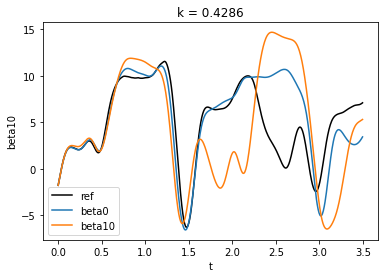

In [236]:
for model in ['ref', 'beta0', 'beta10']:
    color = 'k' if model=='ref' else None
    preds[model].isel(k=3, ens=50).plot(label=model, color=color)
plt.legend()

/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/ext3/miniconda3/lib/python3.9/site-packages/xarray/core/pycompat.py

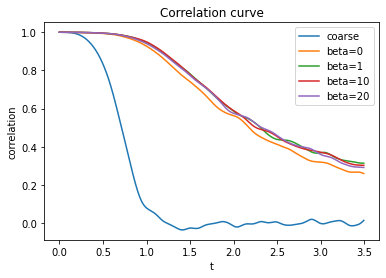

In [247]:
for model, label in zip(
    ['coarse', 'beta0', 'beta1', 'beta10', 'beta20'],
    ['coarse', 'beta=0', 'beta=1', 'beta=10', 'beta=20']
    ):
    xr.corr(preds['ref'], preds[model], ['k', 'ens']).plot(label=label)
plt.legend()
plt.ylabel('correlation')
plt.title('Correlation curve')
plt.savefig('correlation_beta.pdf')